# Processing of data set

In [1]:
!wget https://www2.macs.hw.ac.uk/~js2001/data.csv --no-check-certificate

--2022-11-15 16:27:01--  https://www2.macs.hw.ac.uk/~js2001/data.csv
Resolving www2.macs.hw.ac.uk (www2.macs.hw.ac.uk)... 137.195.15.99
Connecting to www2.macs.hw.ac.uk (www2.macs.hw.ac.uk)|137.195.15.99|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [text/csv]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>] 122.27K   264KB/s    in 0.5s    

2022-11-15 16:27:02 (264 KB/s) - ‘data.csv.2’ saved [125204/125204]



Attribute Information:

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('data.csv')
del data['Unnamed: 32']
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Construction of ANN
we will use Keras and its packages

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [7]:
# Initialising the ANN
classifier = Sequential()

In [8]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

input_dim - number of columns of the dataset 

output_dim - number of outputs to be fed to the next layer, if any

activation - activation function which is ReLU in this case

init - the way in which weights should be provided to an ANN

In [9]:
# Adding the second hidden layer
classifier.add(Dense(units=16, activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

In [10]:
# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [11]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 1st Traning batch_size=100 and epochs=5

Optimizer is chosen as adam for gradient descent.

Binary_crossentropy is the loss function used. 

In [12]:
classifier.fit(X_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
6/6 [==============================] - 1s 5ms/step - loss: 0.5881 - accuracy: 0.7656
Epoch 2/5
6/6 [==============================] - 0s 4ms/step - loss: 0.5512 - accuracy: 0.8184
Epoch 3/5
6/6 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.8516
Epoch 4/5
6/6 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.8672
Epoch 5/5
6/6 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.8945


Batch size defines number of samples that going to be propagated through the network.

An Epoch is a complete pass through all the training data.

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 8ms/step


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[31,  4],
       [ 2, 20]])

<function matplotlib.pyplot.show(*args, **kw)>

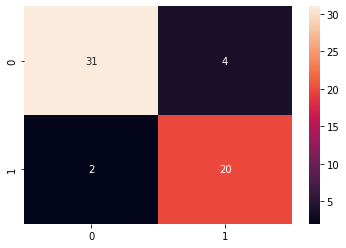

In [15]:
sns.heatmap(cm,annot=True)
plt.show

In [16]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        35
           1       0.83      0.91      0.87        22

    accuracy                           0.89        57
   macro avg       0.89      0.90      0.89        57
weighted avg       0.90      0.89      0.90        57



In [17]:
print("Our model's accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our model's accuracy is 89.47368421052632%


In [36]:
#same like y_pred_prob = classifier.predict_proba(X_test)[:,1]
def predict_prob(number):
  return [number[0],1-number[0]]

y_pred_prob = np.array(list(map(predict_prob, classifier.predict(X_test))))
y_pred_prob = np.argmax(y_pred_prob,axis=1)
y_pred_prob

2/2 [==============================] - 0s 10ms/step


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

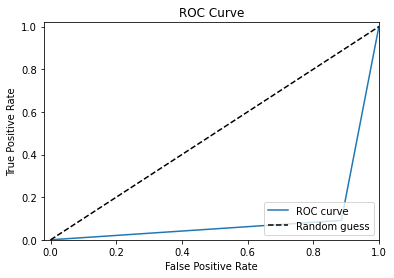

In [34]:
from sklearn.metrics import roc_curve
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [35]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob)

0.1025974025974026

# 2nd Traning batch_size=100 and epochs=10

In [50]:
classifier.fit(X_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
6/6 [==============================] - 0s 3ms/step - loss: 0.1319 - accuracy: 0.9648
Epoch 2/10
6/6 [==============================] - 0s 3ms/step - loss: 0.1188 - accuracy: 0.9668
Epoch 3/10
6/6 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 0.9668
Epoch 4/10
6/6 [==============================] - 0s 2ms/step - loss: 0.1245 - accuracy: 0.9648
Epoch 5/10
6/6 [==============================] - 0s 2ms/step - loss: 0.1130 - accuracy: 0.9668
Epoch 6/10
6/6 [==============================] - 0s 2ms/step - loss: 0.1100 - accuracy: 0.9590
Epoch 7/10
6/6 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.9805
Epoch 8/10
6/6 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9688
Epoch 9/10
6/6 [==============================] - 0s 3ms/step - loss: 0.0947 - accuracy: 0.9785
Epoch 10/10
6/6 [==============================] - 0s 3ms/step - loss: 0.1001 - accuracy: 0.9688


Batch size defines number of samples that going to be propagated through the network.

An Epoch is a complete pass through all the training data.

In [51]:
# Predicting the Test set results
y_pred_b = classifier.predict(X_test)
y_pred_b = (y_pred_b > 0.5)

2/2 [==============================] - 0s 4ms/step


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm_b = confusion_matrix(y_test, y_pred_b)
cm_b

array([[32,  3],
       [ 0, 22]])

<function matplotlib.pyplot.show(*args, **kw)>

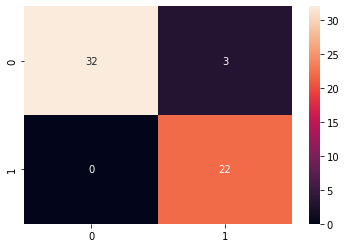

In [53]:
sns.heatmap(cm_b,annot=True)
plt.show

In [54]:
# classification report

print(classification_report(y_test, y_pred_b))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.88      1.00      0.94        22

    accuracy                           0.95        57
   macro avg       0.94      0.96      0.95        57
weighted avg       0.95      0.95      0.95        57



In [55]:
print("Our model's accuracy is {}%".format(((cm_b[0][0] + cm_b[1][1])/57)*100))

Our model's accuracy is 94.73684210526315%


In [56]:
y_pred_prob_b = np.array(list(map(predict_prob, classifier.predict(X_test))))
y_pred_prob_b = np.argmax(y_pred_prob_b,axis=1)
y_pred_prob_b

2/2 [==============================] - 0s 12ms/step


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

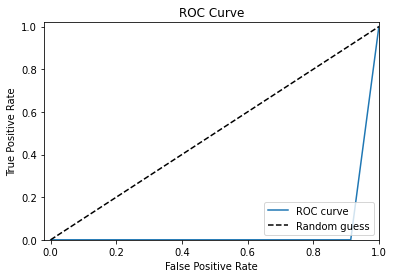

In [57]:
from sklearn.metrics import roc_curve
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_b)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [58]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob_b)

0.04285714285714287

# 3rd Traning batch_size=10 and epochs=10

In [59]:
classifier.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0915 - accuracy: 0.9727
Epoch 2/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.9824
Epoch 3/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 0.9766
Epoch 4/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9746
Epoch 5/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9844
Epoch 6/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9824
Epoch 7/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9824
Epoch 8/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9863
Epoch 9/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9883
Epoch 10/10
52/52 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9805


Batch size defines number of samples that going to be propagated through the network.

An Epoch is a complete pass through all the training data.

In [60]:
# Predicting the Test set results
y_pred_c = classifier.predict(X_test)
y_pred_c = (y_pred_c > 0.5)

2/2 [==============================] - 0s 6ms/step


In [61]:
cm_c = confusion_matrix(y_test, y_pred_c)
cm_c

array([[34,  1],
       [ 0, 22]])

<function matplotlib.pyplot.show(*args, **kw)>

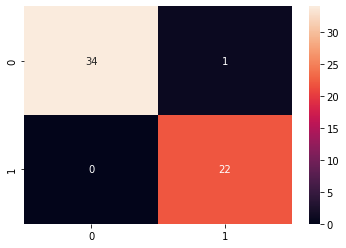

In [62]:
sns.heatmap(cm_c,annot=True)
plt.show

In [63]:
# classification report

print(classification_report(y_test, y_pred_c))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.96      1.00      0.98        22

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



In [64]:
print("Our model's accuracy is {}%".format(((cm_c[0][0] + cm_c[1][1])/57)*100))

Our model's accuracy is 98.24561403508771%


In [65]:
y_pred_prob_c = np.array(list(map(predict_prob, classifier.predict(X_test))))
y_pred_prob_c = np.argmax(y_pred_prob_c,axis=1)
y_pred_prob_c

2/2 [==============================] - 0s 9ms/step


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

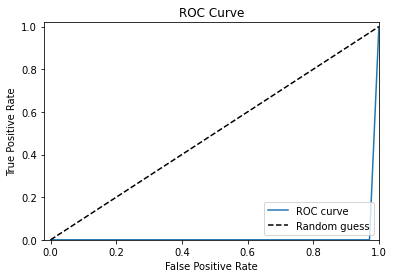

In [66]:
from sklearn.metrics import roc_curve
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_c)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [68]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_prob_c)

0.01428571428571429

# 4th Traning batch_size=100 and epochs=100

In [69]:
classifier.fit(X_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9883
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9863
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9844
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9863
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9863
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9805
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0548 - accuracy: 0.9844
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9863
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9883
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9902
Epoch 11/100
6/6 [===========

Batch size defines number of samples that going to be propagated through the network.

An Epoch is a complete pass through all the training data.

In [70]:
# Predicting the Test set results
y_pred_d = classifier.predict(X_test)
y_pred_d = (y_pred_d > 0.5)

2/2 [==============================] - 0s 14ms/step


In [71]:
cm_d = confusion_matrix(y_test, y_pred_d)
cm_d

array([[34,  1],
       [ 0, 22]])

<function matplotlib.pyplot.show(*args, **kw)>

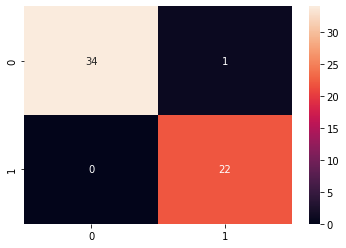

In [72]:
sns.heatmap(cm_d,annot=True)
plt.show

In [73]:
# classification report

print(classification_report(y_test, y_pred_d))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.96      1.00      0.98        22

    accuracy                           0.98        57
   macro avg       0.98      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



In [74]:
print("Our model's accuracy is {}%".format(((cm_d[0][0] + cm_d[1][1])/57)*100))

Our model's accuracy is 98.24561403508771%


In [75]:
y_pred_prob_d = np.array(list(map(predict_prob, classifier.predict(X_test))))
y_pred_prob_d = np.argmax(y_pred_prob_d,axis=1)
y_pred_prob_d

2/2 [==============================] - 0s 7ms/step


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

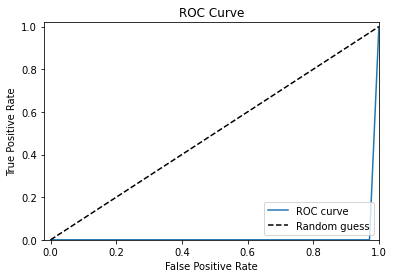

In [79]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_d)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [80]:
roc_auc_score(y_test, y_pred_prob_d)

0.01428571428571429

# 5th Traning batch_size=10 and epochs=100

In [81]:
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9883
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0333 - accuracy: 0.9883
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9902
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9941
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9902
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9883
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.9902
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9922
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9902
Epoch 10/100
52/52 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9922
Epoch 11/

Batch size defines number of samples that going to be propagated through the network.

An Epoch is a complete pass through all the training data.

In [82]:
# Predicting the Test set results
y_pred_e = classifier.predict(X_test)
y_pred_e = (y_pred_e > 0.5)

2/2 [==============================] - 0s 6ms/step


In [83]:
cm_e = confusion_matrix(y_test, y_pred_e)
cm_e

array([[35,  0],
       [ 0, 22]])

<function matplotlib.pyplot.show(*args, **kw)>

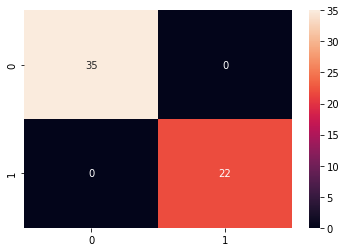

In [84]:
sns.heatmap(cm_e,annot=True)
plt.show

In [85]:
# classification report

print(classification_report(y_test, y_pred_e))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        22

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [86]:
print("Our model's accuracy is {}%".format(((cm_e[0][0] + cm_e[1][1])/57)*100))

Our model's accuracy is 100.0%


In [87]:
y_pred_prob_e = np.array(list(map(predict_prob, classifier.predict(X_test))))
y_pred_prob_e = np.argmax(y_pred_prob_e,axis=1)
y_pred_prob_e

2/2 [==============================] - 0s 9ms/step


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

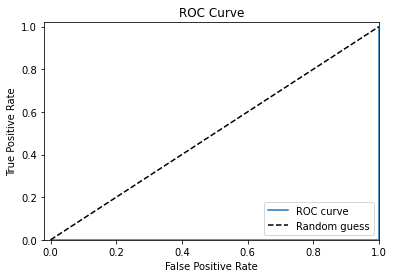

In [88]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_e)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [89]:
roc_auc_score(y_test, y_pred_prob_e)

0.0

# Training New Model of Our Dataset into Train(70%) / Test data(30%)

with batch_size=10 and epochs=100

In [91]:
train,test = train_test_split(data, test_size=0.3, random_state=42)
print("Training Data :",train.shape)
print("Testing Data :",test.shape)

Training Data : (398, 32)
Testing Data : (171, 32)


In [92]:
train_id = train['id']
test_id = test['id']

train_data = train.iloc[:,1:]
test_data = test.iloc[:,1:]

print("Training Data :",train_data.shape)
print("Testing Data :",test_data.shape)

Training Data : (398, 31)
Testing Data : (171, 31)


In [94]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
# Training Data
train_x = train_data.iloc[:,1:]
train_x = MinMaxScaler().fit_transform(train_x)
print("Training Data :", train_x.shape)

# Testing Data
test_x = test_data.iloc[:,1:]
test_x = MinMaxScaler().fit_transform(test_x)
print("Testing Data :", test_x.shape)

Training Data : (398, 30)
Testing Data : (171, 30)


In [96]:
# Training Data
train_y = train_data.iloc[:,:1]
train_y[train_y=='M'] = 0
train_y[train_y=='B'] = 1
print("Training Data :", train_y.shape)

# Testing Data
test_y = test_data.iloc[:,:1]
test_y[test_y=='M'] = 0
test_y[test_y=='B'] = 1
print("Testing Data :", test_y.shape)

Training Data : (398, 1)
Testing Data : (171, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

We need to Convert a NumPy array to a Tensor

In [101]:
train_x = np.asarray(train_x).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)
test_x = np.asarray(test_x).astype(np.float32)
test_y = np.asarray(test_y).astype(np.float32)

In [102]:
classifier.fit(train_x, train_y, batch_size=10, epochs=100)

Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 0.9774
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.9623
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.9573
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.9749
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9799
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9724
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.9849
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0849 - accuracy: 0.9673
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.9648
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0985 - accuracy: 0.9648
Epoch 11/

In [103]:
y_pred_d = classifier.predict(test_x)
y_pred_d = (y_pred_d > 0.5)
cm_d = confusion_matrix(test_y, y_pred_d)
cm_d

6/6 [==============================] - 0s 2ms/step


array([[63,  0],
       [16, 92]])

<function matplotlib.pyplot.show(*args, **kw)>

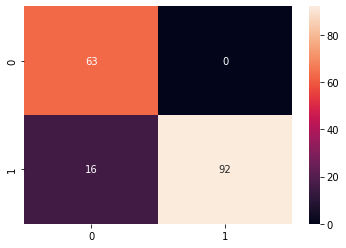

In [104]:
sns.heatmap(cm_d,annot=True)
plt.show

In [107]:
# classification report

print(classification_report(test_y, y_pred_d))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        63
         1.0       1.00      0.85      0.92       108

    accuracy                           0.91       171
   macro avg       0.90      0.93      0.90       171
weighted avg       0.93      0.91      0.91       171



In [111]:
print("Our model's accuracy is {}%".format(((cm_d[0][0] + cm_d[1][1])/171)*100))

Our model's accuracy is 90.64327485380117%


In [112]:
y_pred_prob_d = np.array(list(map(predict_prob, classifier.predict(test_x))))
y_pred_prob_d = np.argmax(y_pred_prob_d,axis=1)
y_pred_prob_d

6/6 [==============================] - 0s 2ms/step


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

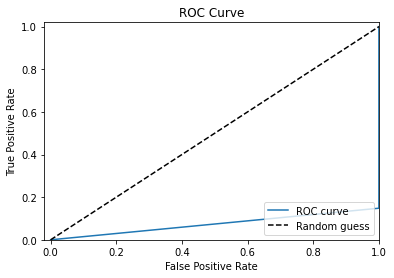

In [113]:
%matplotlib inline
fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob_d)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [115]:
roc_auc_score(test_y, y_pred_prob_d)

0.07407407407407407